# Rocket Propellant Example

In [1]:
# Burning Rate
r1=c(24, 20, 19, 24, 24)
r2=c(17, 24, 30, 27, 36)
r3=c(18, 38, 26, 27, 21)
r4=c(26, 31, 26, 23, 22)
r5=c(22, 30, 20, 29, 31)
data <- data.frame(rbind(r1, r2, r3, r4, r5))
data

,X1,X2,X3,X4,X5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
r1,24,20,19,24,24
r2,17,24,30,27,36
r3,18,38,26,27,21
r4,26,31,26,23,22
r5,22,30,20,29,31


In [2]:
# Arrange responses by row
y <- c(r1, r2, r3, r4, r5)
y

[1] 24 20 19 24 24 17 24 30 27 36 18 38 26 27 21 26 31 26 23 22 22 30 20 29 31

In [3]:
# Generate column block index for response values
operators <- as.factor(rep(1:5, times = 5))
operators

[1] 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5
Levels: 1 2 3 4 5

In [4]:
# Generate row block index for response values
batches <- as.factor(rep(1:5, each = 5))
batches

[1] 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5
Levels: 1 2 3 4 5

In [6]:
# Formulations sequence for response values
formulations=c("A", "B", "C", "D", "E","B", "C", "D", "E","A", "C",
"D", "E","A", "B","D", "E","A", "B", "C","E","A", "B", "C", "D")
formulations

[1] "A" "B" "C" "D" "E" "B" "C" "D" "E" "A" "C" "D" "E" "A" "B" "D" "E" "A" "B"
[20] "C" "E" "A" "B" "C" "D"

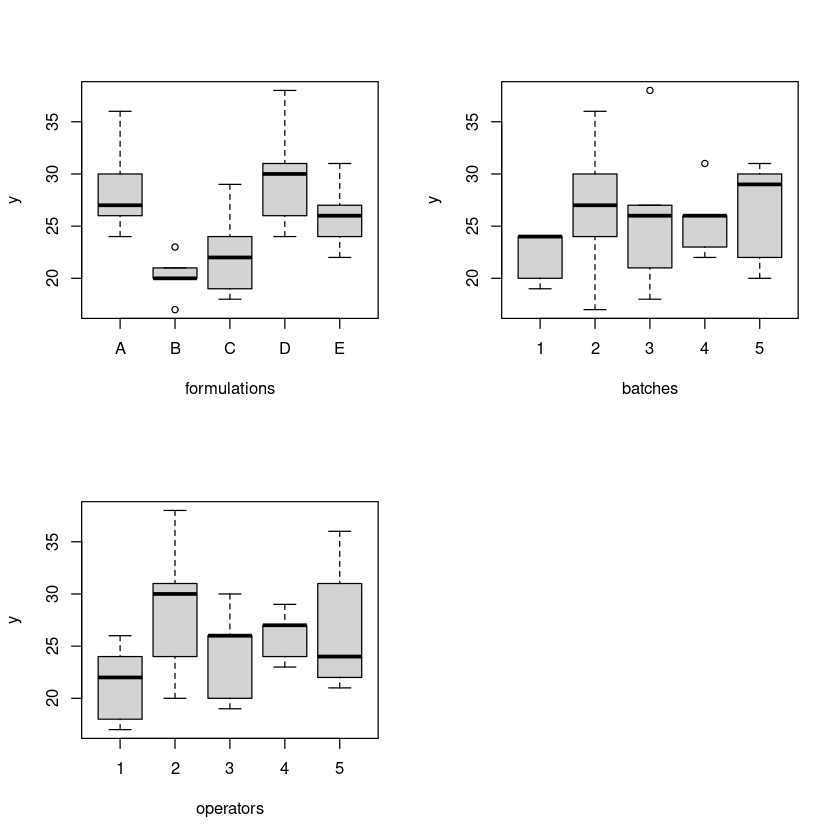

In [7]:
# Box plot
par(mfrow=c(2,2))
boxplot(y~formulations)
boxplot(y~batches)
boxplot(y~operators)

In [8]:
# Get the ANOVA table of Latin Square
model=aov(y~formulations+batches+operators)
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
formulations,4,330,82.50000,7.734375,0.002536502
batches,4,68,17.00000,1.593750,0.239058537
operators,4,150,37.50000,3.515625,0.040373048
Residuals,12,128,10.66667,NA,NA


In [10]:
# Get the formulation mean
library(emmeans)
emmeans(model, "formulations")

 formulations emmean   SE df lower.CL upper.CL
 A              28.6 1.46 12     25.4     31.8
 B              20.2 1.46 12     17.0     23.4
 C              22.4 1.46 12     19.2     25.6
 D              29.8 1.46 12     26.6     33.0
 E              26.0 1.46 12     22.8     29.2

Results are averaged over the levels of: batches, operators 
Confidence level used: 0.95 

**GRACEO-LATIN SQUARES DESIGN**

In [12]:
assemblies=c("alp", "gam", "eps", "bet", "del", "bet", "del", "alp", "gam",
"eps", "gam", "eps", "bet", "del", "alp", "del", "alp", "gam", "eps",
"bet", "eps", "bet", "del", "alp", "gam")
assemblies

[1] "alp" "gam" "eps" "bet" "del" "bet" "del" "alp" "gam" "eps" "gam" "eps"
[13] "bet" "del" "alp" "del" "alp" "gam" "eps" "bet" "eps" "bet" "del" "alp"
[25] "gam"

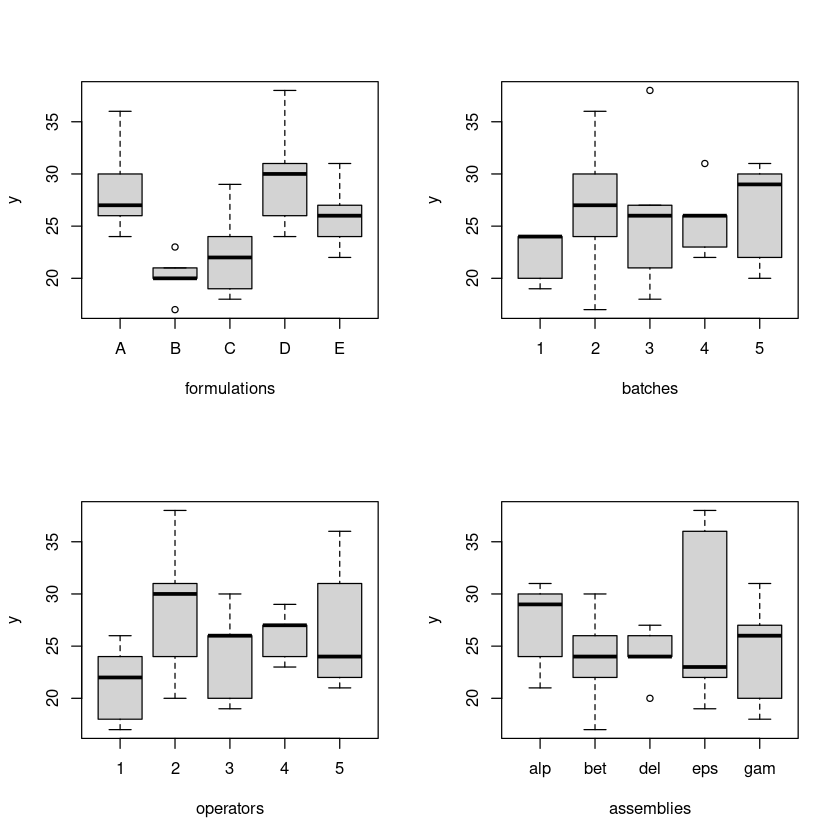

In [13]:
# Box plot
par(mfrow=c(2,2))
boxplot(y~formulations)
boxplot(y~batches)
boxplot(y~operators)
boxplot(y~assemblies)

In [14]:
# Clear the current plot
dev.off()

null device 
          1

In [15]:
# Get the ANOVA table of Graeco-Latin Square
model1=aov(y~formulations+batches+operators+assemblies)
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
formulations,4,330,82.50,10.000000,0.003343621
batches,4,68,17.00,2.060606,0.178310856
operators,4,150,37.50,4.545455,0.032930411
assemblies,4,62,15.50,1.878788,0.207641300
Residuals,8,66,8.25,NA,NA


In [16]:
# Other way
model2=aov(y~Error(batches+operators+assemblies)+formulations)
summary(model2)


Error: batches
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  4     68      17               

Error: operators
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  4    150    37.5               

Error: assemblies
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  4     62    15.5               

Error: Within
             Df Sum Sq Mean Sq F value  Pr(>F)   
formulations  4    330   82.50      10 0.00334 **
Residuals     8     66    8.25                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [17]:
# Get the test assemblies mean
library(emmeans)
emmeans(model1, "assemblies")

 assemblies emmean   SE df lower.CL upper.CL
 alp          27.0 1.28  8     24.0     30.0
 bet          23.8 1.28  8     20.8     26.8
 del          24.2 1.28  8     21.2     27.2
 eps          27.6 1.28  8     24.6     30.6
 gam          24.4 1.28  8     21.4     27.4

Results are averaged over the levels of: formulations, batches, operators 
Confidence level used: 0.95 

In [18]:
# In this situation the design was provided, but using agricolae package we can generate Latin squares
# and Graeco-Latin squares.
library(agricolae)
trt = c("A", "B", "C", "D", "E")
outdesign = design.lsd(trt)
outdesign$sketch

D,E,A,C,B
C,D,E,B,A
E,A,B,D,C
B,C,D,A,E
A,B,C,E,D


In [20]:
# Check interaction between batches and operators
library(dae)
data1=data.frame(cbind(y,batches,operators))
model3=aov(y~batches+operators)
anova(model3)
tukey.1df(model3, data1)

Loading required package: ggplot2



,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
batches,4,68,17.000,0.5938865,0.6721031
operators,4,150,37.500,1.3100437,0.3083117
Residuals,16,458,28.625,NA,NA


$Tukey.SS
[1] 0.2591143

$Tukey.F
[1] 0.00849108

$Tukey.p
[1] 0.9278006

$Devn.SS
[1] 457.7409